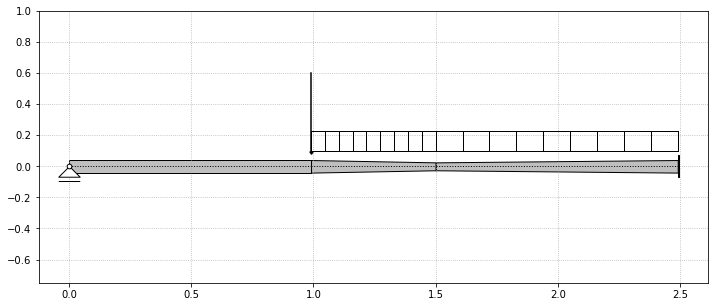

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import stanpy as stp

E = 210000000  # kN/m^2
E = 21e7  # kN/m^2
l1, l3 = 0.99, 0.99  # m
l2 = 0.51  # m
ha, hb, hd = 0.25, 0.25, 0.25  # m
hc = 0.15  # m
b = 0.2  # m
t = 0.02  # m
s = 0.015  # m
q = 3.04  # kN/m
P = 9.96  # kN
Ag = b * t

x_sym = sym.Symbol("x")

hx2 = hb - (hb - hc) / l2 * x_sym
hx3 = hc + (hd - hc) / l3 * x_sym

b_vec = np.array([b, s, b])
h1_vec = np.array([t, ha - t, t])
h2_vec = np.array([t, hx2 - t, t])
h3_vec = np.array([t, hx3 - t, t])

cs_props1 = stp.cs(b=b_vec, h=h1_vec)
s1 = {"E": E, "cs": cs_props1, "l": l1, "P": (P, l1), "bc_i": {"w": 0, "M": 0, "H": 0}}

cs_props2 = stp.cs(b=b_vec, h=h2_vec)
s2 = {"E": E, "cs": cs_props2, "q": q, "l": l2}

cs_props3 = stp.cs(b=b_vec, h=h3_vec)
s3 = {"E": E, "cs": cs_props3, "q": q, "l": l3, "bc_k": {"w": 0, "phi": 0}}

s = [s1, s2, s3]

fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s, render=True, facecolor="gray", alpha=0.5, render_scale=0.3)
stp.plot_load(ax, *s)
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-0.75, 1.0)
plt.show()